## Importing Libraries

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from lightgbm.sklearn import LGBMClassifier

## Reading Data

In [51]:
TrainData = pd.read_csv('train.csv')
TestData = pd.read_csv('test.csv')

## Exploring Data

In [52]:
TrainData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


#### Count of Values in Categorical Columns

In [53]:
TrainData['stroke'].value_counts()

0    14672
1      632
Name: stroke, dtype: int64

In [54]:
TrainData['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [55]:
TrainData['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [56]:
TrainData['Residence_type'].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [57]:
TrainData['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [58]:
TrainData['hypertension'].value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

In [59]:
TrainData['work_type'].value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [60]:
TrainData['heart_disease'].value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

#### Check Outliers in Numerical Columns

Text(0.5, 1.0, 'Age')

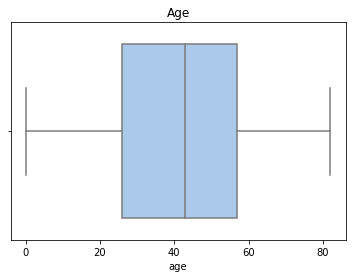

In [12]:
sns.boxplot(x=TrainData['age'],palette='pastel').set_title('Age')

Text(0.5, 1.0, 'BMI')

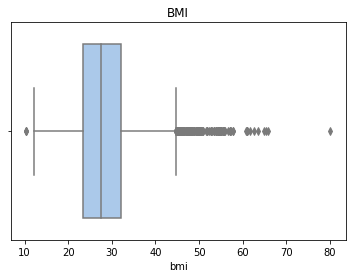

In [13]:
sns.boxplot(x=TrainData['bmi'],palette='pastel').set_title('BMI')

Text(0.5, 1.0, 'Glucose Level')

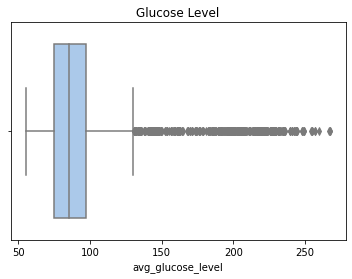

In [61]:
sns.boxplot(x=TrainData['avg_glucose_level'],palette='pastel').set_title('Glucose Level')

#### Relation between categorical column and people suffer from stroke

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

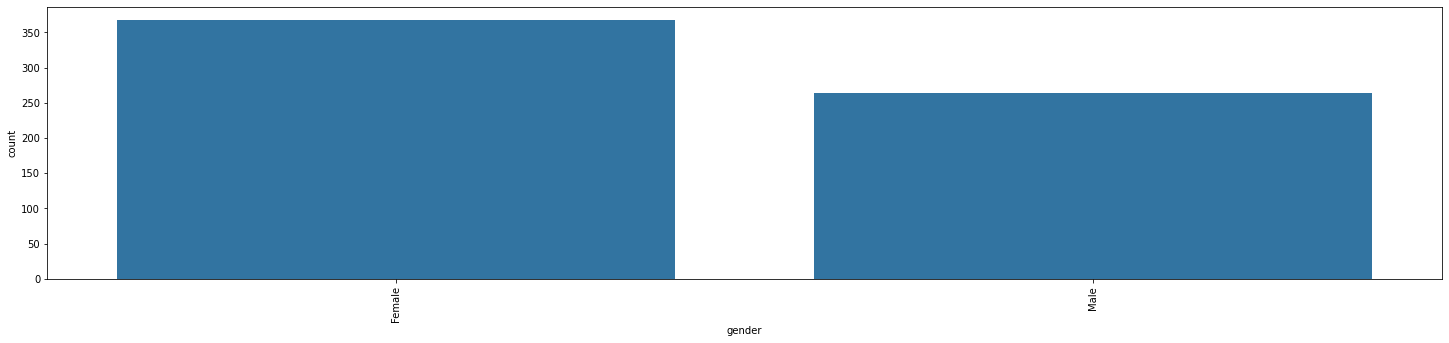

In [62]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['stroke']==1, 'gender'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

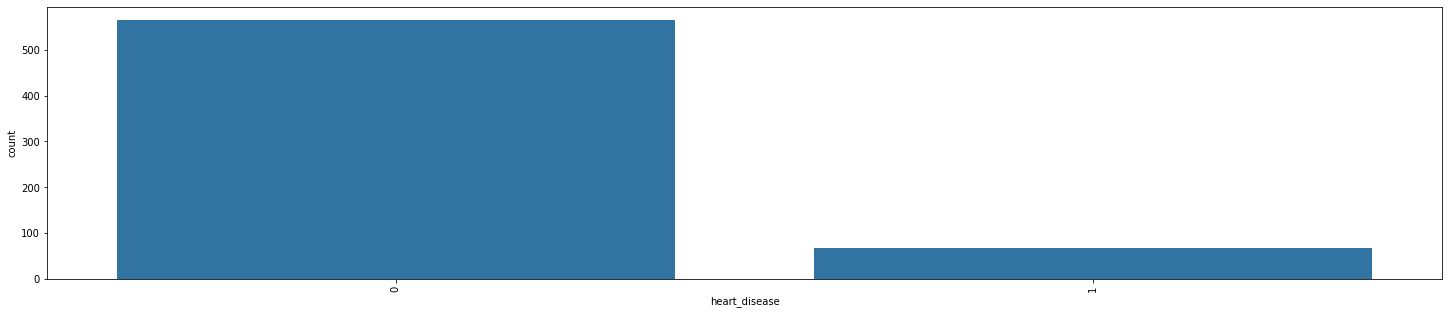

In [16]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['stroke']==1, 'heart_disease'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

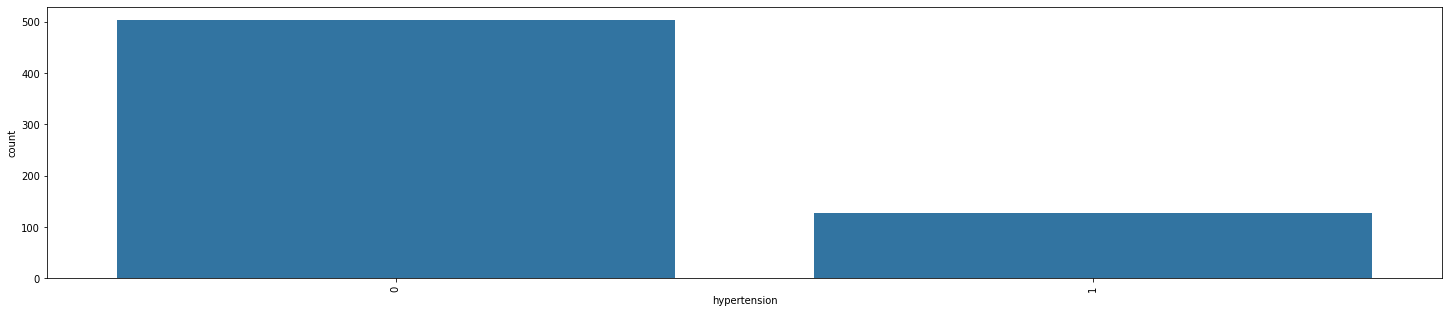

In [17]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['stroke']==1, 'hypertension'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

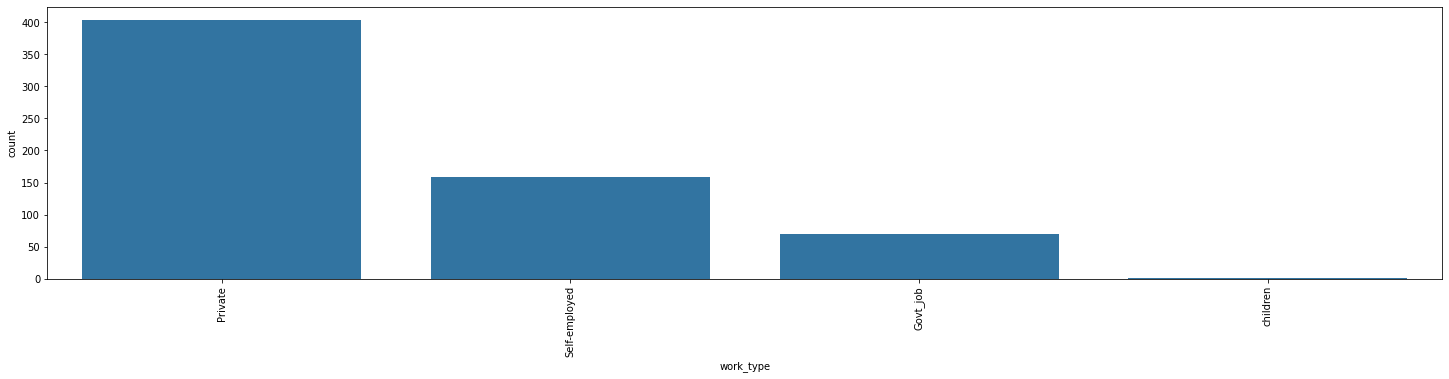

In [18]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['stroke']==1, 'work_type'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'never smoked'),
  Text(1, 0, 'formerly smoked'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'smokes')])

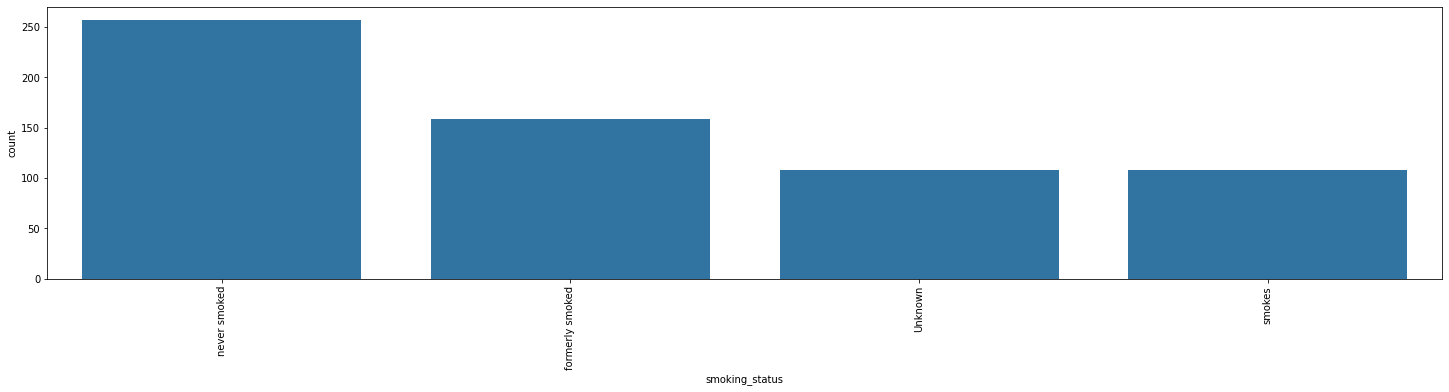

In [19]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['stroke']==1, 'smoking_status'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

## Data Cleaning

#### Dealing with outliers outliers

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

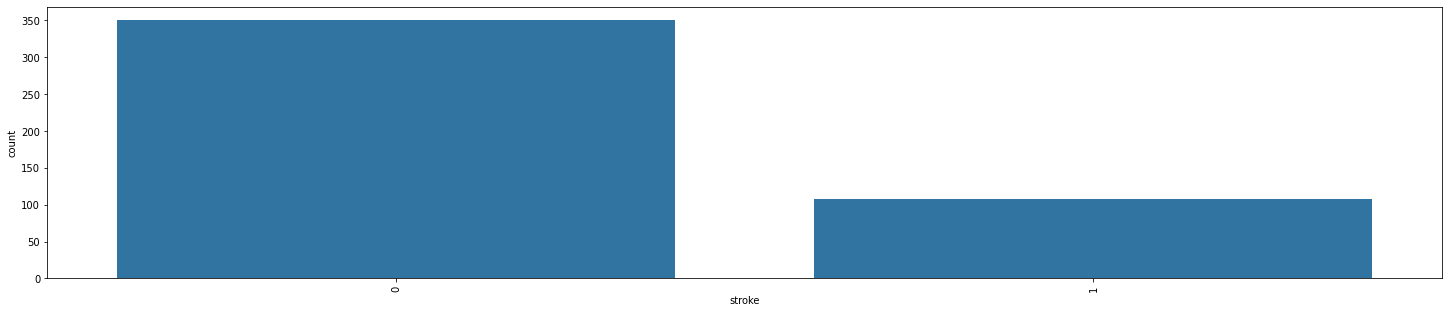

In [20]:
## Since High Glucose Level in blood and BMI still has an effect on strokes, outliers won't be removed
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['avg_glucose_level']>145, 'stroke'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

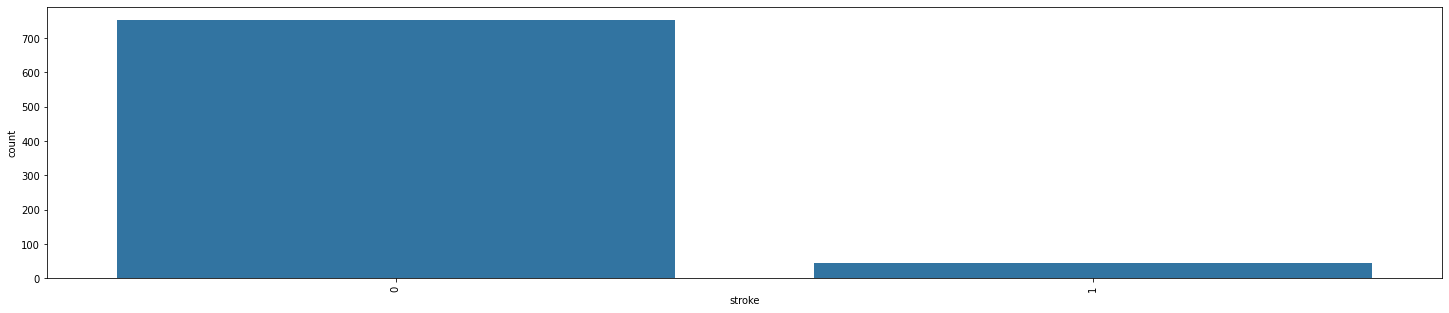

In [21]:
plt.figure(figsize = [25, 5]) 
base_color = sns.color_palette()[0]
Query = TrainData.loc[TrainData['bmi'] > 40, 'stroke'] 
sns.countplot(x=Query, color = base_color)
plt.xticks(rotation=90)

In [22]:
"""
In work_type Column:
1- Remove never_worked as it is number very small 
2- Remove Children as it doesn't affect stroke rate
"""
work_type_filtered = TrainData[(TrainData['work_type'] == 'Never_worked') | (TrainData['work_type'] == 'children')].index
TrainData.drop(work_type_filtered, inplace=True)


In [23]:
"""
In gender Column:
1- Remove other
2- Remove Children as it doesn't affect stroke rate
"""
gender_filtered = TrainData[(TrainData['gender'] == 'Other')].index
TrainData.drop(gender_filtered, inplace=True)


#### Label Encoder for Categorical Data

In [24]:
TrainData['gender'] = TrainData['gender'].map({'Female':0, 'Male': 1})
TestData['gender'] = TestData['gender'].map({'Female':0, 'Male': 1, 'Other' : 2})
TrainData['ever_married'] = TrainData['ever_married'].map({'No':0, 'Yes': 1})
TestData['ever_married'] = TestData['ever_married'].map({'No':0, 'Yes': 1})
TrainData['work_type'] = TrainData['work_type'].map({'Private':0, 'Self-employed': 1,'Govt_job':2})
TestData['work_type'] = TestData['work_type'].map({'Private':0, 'Self-employed': 1,'Govt_job':2, 'children':3, 'Never_worked':4})
TrainData['Residence_type'] = TrainData['Residence_type'].map({'Urban':0, 'Rural': 1})
TestData['Residence_type'] = TestData['Residence_type'].map({'Urban':0, 'Rural': 1})
TrainData['smoking_status'] = TrainData['smoking_status'].map({'never smoked':0, 'Unknown': 1,'formerly smoked':2, 'smokes':3})
TestData['smoking_status'] = TestData['smoking_status'].map({'never smoked':0, 'Unknown': 1,'formerly smoked':2, 'smokes':3})

In [25]:
X = TrainData.drop(['id', 'stroke'], axis = 1)
Y= TrainData['stroke']
XTest = TestData.drop(['id'], axis = 1)
testID = TestData['id']
print(X.shape)
print(Y.shape)
print(XTest.shape)

(13224, 10)
(13224,)
(10204, 10)


In [26]:
XTest.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,1,0,1,82.54,33.4,1
1,1,70.0,1,0,1,0,0,72.06,28.5,1
2,0,5.0,0,0,0,3,0,103.72,19.5,1
3,0,56.0,0,0,1,2,0,69.24,41.4,3
4,1,32.0,0,0,1,0,1,111.15,30.1,3


In [27]:
Norm = MinMaxScaler()
X_Scale = X.values
XTest_Scale = XTest.values
X_Scale = Norm.fit_transform(X_Scale) 
X.loc[:,:] = X_Scale
XTest_Scale = Norm.transform(XTest_Scale)
XTest.loc[:,:] = XTest_Scale

## Training ML Model

In [28]:
models = []
skf = StratifiedKFold(n_splits=5)

In [29]:
scores = []
for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    model = LGBMClassifier(class_weight='balanced', n_estimators=30, random_state=42)
    model.fit(x_train, y_train)

    models.append(model)
    scores.append(roc_auc_score(y_val, model.predict_proba(x_val)[:, 1]))
print(f'mean score: {np.mean(scores):.4f}')

mean score: 0.8655


In [30]:
scores = []
for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]

    model = SGDClassifier(penalty='elasticnet', loss='log', class_weight='balanced', random_state=42)
    model.fit(x_train, y_train)

    models.append(model)
    scores.append(roc_auc_score(y_val, model.predict_proba(x_val)[:, 1]))
print(f'mean score: {np.mean(scores):.4f}')

mean score: 0.8639


In [31]:
scores = []
for train_index, val_index in skf.split(X, Y):
    x_train, x_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
    model.fit(x_train, y_train)

    models.append(model)
    scores.append(roc_auc_score(y_val, model.predict_proba(x_val)[:, 1]))
print(f'mean score: {np.mean(scores):.4f}')

mean score: 0.8647


In [32]:
predictions = []
for model in models:
    ypred = model.predict_proba(XTest)[:, 1]
    predictions.append(ypred)

In [33]:
predictions = np.array(predictions).mean(0)

In [34]:
dict = {'id':testID,'stroke':predictions}
DF = pd.DataFrame.from_dict(dict)
DF.to_csv('submissions.csv', index=False)

In [35]:
DF

,id,stroke
0,15304,0.406526
1,15305,0.755494
2,15306,0.012748
3,15307,0.477484
4,15308,0.104453
...,...,...
10199,25503,0.026389
10200,25504,0.216801
10201,25505,0.012237
10202,25506,0.053348
